<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [7]:
data = pd.read_csv('./train.csv')

In [8]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Выведем информацию о количестве Nan объектов в каждой колонке:

In [9]:
# YOUR CODE
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

По полученным данным можно предположить, что Nan-объектов нет и данные чистые. Проверим это предположение:

In [10]:
def data_nan(data):
    df = data.isna()
    return df[df==True].count()

In [11]:
data_nan(data)

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Преобразуем категориальные признаки в нумеретик, эта функция переведёт все нечисловые значения в NaN

In [12]:
for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors = 'coerce')

In [13]:
data_nan(data)

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Появились NaN-объекты в столбце общих трат, давайте проанализируем, когда они появились. Предположим эти пропуски были незаполнены, так как клиент просто ничего не потратил, тогда проверим всех клиентов, которые потратили 0 всего:

In [14]:
data[data['TotalSpent']==0]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn


In [15]:
data[data['TotalSpent']==0].count()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Как видно, таких клиентов нет в выборке. Далее заменим NaN значения на 0 и посмотрим на полученных клиентов:

In [16]:
data = data.fillna(0)

In [17]:
data[data['TotalSpent']==0]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,0.0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,0.0,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,0.0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,0.0,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,0.0,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,0.0,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,0.0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,0.0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,0.0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Из полученных данных можно сделать вывод, что эти клиенты только пришли и ничего не успели потратить, и итог они пока что не уйдут, а значит и бонусы им для удержания не нужно предлагать. Поэтому мы с чистой совестью можем добавить их в выборку. Удостоверимся, что всё сделано правильно и удалились все NaN значения:

In [18]:
data_nan(data)

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

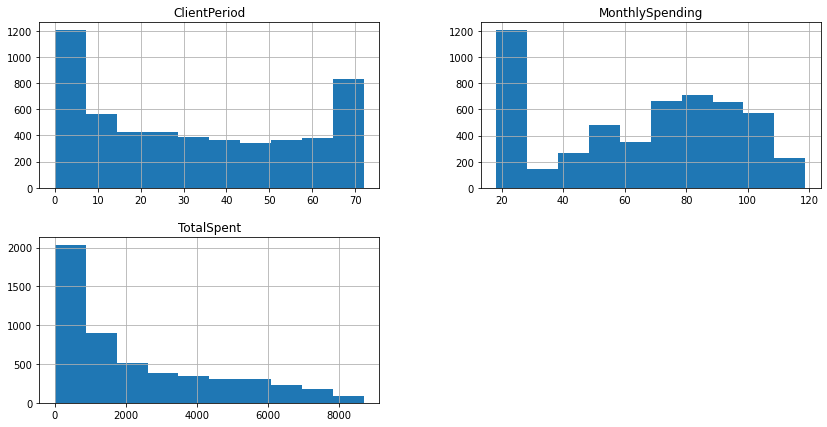

In [19]:
data[num_cols].hist(figsize=(14,7))
pass

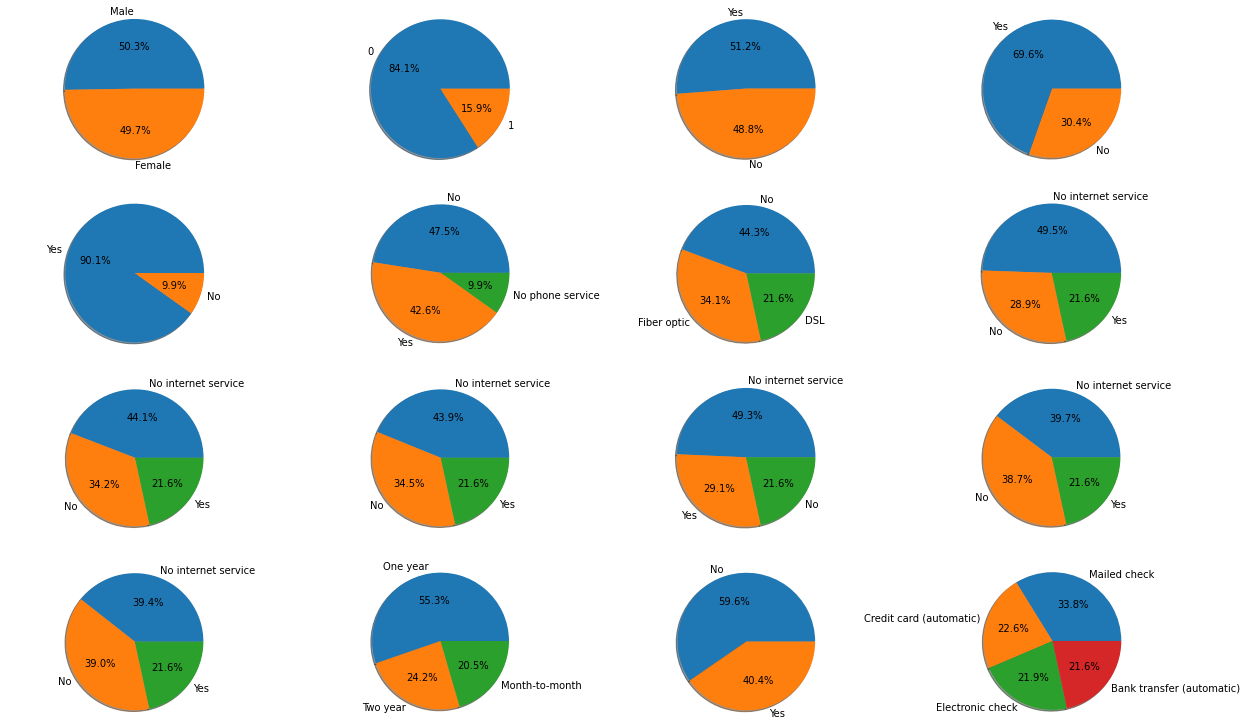

In [20]:
fig, axs = plt.subplots(4, 4, figsize=(21,13))
for i in range(4):
    for j in range(4):
        col = cat_cols[i*4 + j]
        axs[i, j].pie(data[col].value_counts(), labels=data[col].unique(), autopct='%1.1f%%',  shadow=True)
        axs[i, j].axis('equal')
plt.show()

In [21]:
import seaborn as sns

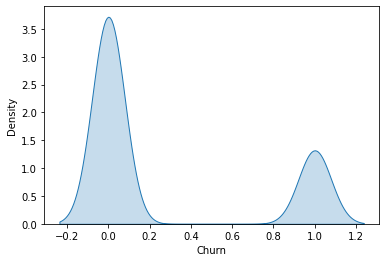

In [22]:
snsplot = sns.kdeplot(data[target_col], shade=True)
fig = snsplot.get_figure()

Классы получились несбалансированные, примерное соотношение 3:1.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

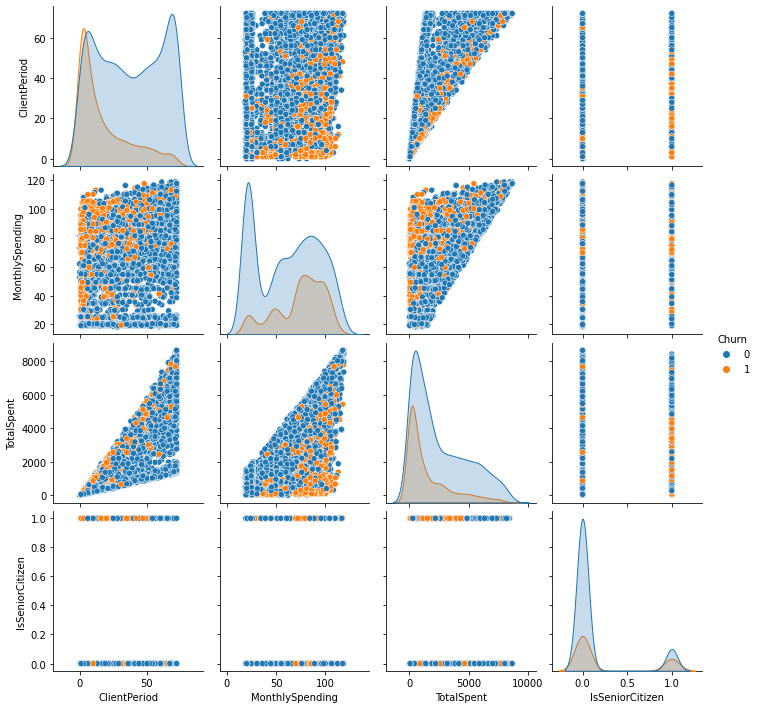

In [23]:
# YOUR CODE
sns.pairplot(data, hue='Churn', diag_kws={'bw': 0.2})

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [24]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

In [25]:
# YOUR CODE
numeric_data = data[num_cols]
categorical_data = data[cat_cols]
dummy = pd.get_dummies(categorical_data) # One-hot кодирование
X = pd.concat([numeric_data, dummy], axis=1)
X_true = data[feature_cols]
y = data[target_col]

In [26]:
# Разделим на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.9, random_state=42)

In [27]:
# Нормализуем данные
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [28]:
model_log = LogisticRegressionCV(scoring='roc_auc', refit=True)
model_log.fit(X_train_norm, y_train)
model_log.score(X_test_norm, y_test)

0.8009456481821521

In [29]:
prepocessing = make_column_transformer(
    #(OrdinalEncoder(), cat_cols),
    (OneHotEncoder(handle_unknown='ignore'), cat_cols),
    (StandardScaler(), num_cols)
)
lrm = Pipeline(steps=[
    ('prepoc',prepocessing),
    ('classifier', LogisticRegression())
]
)

In [30]:
param_grid = {
    'classifier__C': np.array([100., 10., 1., 0.1, 0.01, 0.001]), 
}
cv_model = GridSearchCV(estimator=lrm, 
                            param_grid=param_grid,
                            cv=5, 
                            scoring='roc_auc',
                            refit=True,
                            n_jobs=-1, 
                            verbose=10)

In [31]:
clf = cv_model.fit(X_true, y.values)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.6s finished


In [32]:
clf.best_score_

0.8451139235772726

In [33]:
clf.best_params_

{'classifier__C': 100.0}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее значение получилось:0.845 с параметром C: 100

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [37]:
# YOUR CODE
import catboost
from sklearn.metrics import roc_auc_score, roc_curve

In [38]:
X_cb_train, X_cb_test, y_cb_train, y_cb_test = train_test_split(X_true, y,
                                                                train_size=0.8, random_state=42)

In [39]:
model_CB = catboost.CatBoostClassifier(n_estimators=200, cat_features=cat_cols)

model_CB.fit(X_cb_train, y_cb_train)

y_train_predict = model_CB.predict_proba(X_cb_train)[:, 1]
y_test_predict = model_CB.predict_proba(X_cb_test)[:, 1]


Learning rate set to 0.083391
0:	learn: 0.6382749	total: 68.1ms	remaining: 13.5s
1:	learn: 0.5970973	total: 80.1ms	remaining: 7.93s
2:	learn: 0.5610080	total: 93ms	remaining: 6.1s
3:	learn: 0.5329491	total: 106ms	remaining: 5.21s
4:	learn: 0.5112068	total: 120ms	remaining: 4.67s
5:	learn: 0.4930985	total: 133ms	remaining: 4.3s
6:	learn: 0.4800850	total: 143ms	remaining: 3.95s
7:	learn: 0.4681540	total: 157ms	remaining: 3.77s
8:	learn: 0.4583285	total: 169ms	remaining: 3.58s
9:	learn: 0.4494858	total: 183ms	remaining: 3.47s
10:	learn: 0.4439489	total: 196ms	remaining: 3.37s
11:	learn: 0.4371125	total: 214ms	remaining: 3.35s
12:	learn: 0.4311122	total: 229ms	remaining: 3.29s
13:	learn: 0.4264039	total: 244ms	remaining: 3.24s
14:	learn: 0.4222915	total: 257ms	remaining: 3.17s
15:	learn: 0.4190003	total: 271ms	remaining: 3.11s
16:	learn: 0.4153313	total: 284ms	remaining: 3.06s
17:	learn: 0.4132986	total: 296ms	remaining: 2.99s
18:	learn: 0.4116653	total: 306ms	remaining: 2.91s
19:	learn: 0

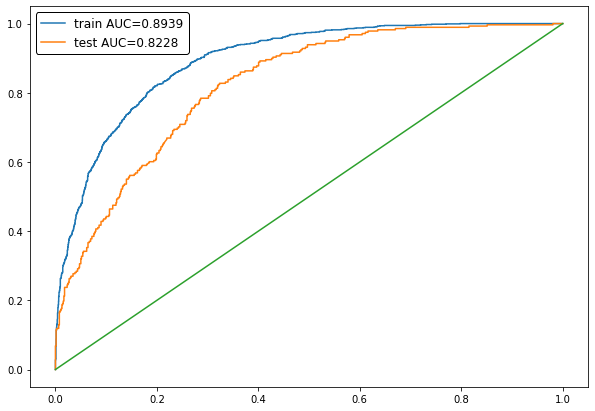

In [40]:
train_auc = roc_auc_score(y_cb_train, y_train_predict)
test_auc = roc_auc_score(y_cb_test, y_test_predict)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_cb_train, y_train_predict)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_cb_test, y_test_predict)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [52]:
best_model = catboost.CatBoostClassifier(
   n_estimators=200,
   silent=True,
   cat_features=cat_cols,
   eval_metric = 'AUC'
)

grid_param = {
    'learning_rate':[0.01, 0.02, 0.03, 0.04, 0.1],
    'depth':[4,5,6,8,9,10],
    'l2_leaf_reg':np.linspace(0, 1, 10)
}

gris_search_cb = best_model.grid_search(grid_param,
                                        X=X_true,
                                        y=y,
                                        cv=3,
                                        refit=True
                                        )




bestTest = 0.8708443196
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8708443	best: 0.8708443 (0)	total: 1.66s	remaining: 15m 25s

bestTest = 0.8734977454
bestIteration = 120

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8734977	best: 0.8734977 (1)	total: 3.35s	remaining: 15m 34s

bestTest = 0.8709183576
bestIteration = 25

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8709184	best: 0.8734977 (1)	total: 5.1s	remaining: 15m 46s

bestTest = 0.8693778899
bestIteration = 30

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8693779	best: 0.8734977 (1)	total: 6.9s	remaining: 15m 59s


In [56]:
best_model.best_score_

{'learn': {'Logloss': 0.16449224693225148}}

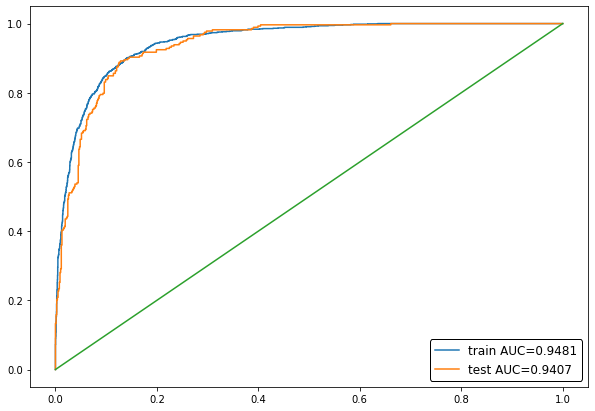

In [57]:
y_train_predict = best_model.predict_proba(X_cb_train)[:, 1]
y_test_predict = best_model.predict_proba(X_cb_test)[:, 1]

train_auc = roc_auc_score(y_cb_train, y_train_predict)
test_auc = roc_auc_score(y_cb_test, y_test_predict)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_cb_train, y_train_predict)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_cb_test, y_test_predict)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее решение на Kaggle: 0.85219

# Предсказания

In [58]:
best_model = best_model# какая-то предыдущая модель

In [68]:
X_test = pd.read_csv('./test.csv')

for col in num_cols:
    X_test[col] = pd.to_numeric(X_test[col], errors = 'coerce')
X_test = X_test.fillna(0)

submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1] # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.